<h1><center>ASSIGNMENT 2</center></h1>
## TASK 1: Finding out Pearson correlation coefficient
### Selecting interesting variables
The *properties_2016.csv* file contains 58 columns of which one is the parcelid. A lot of the columns are mostly blank and so cannot be used for visualizing any meaningful relationships with other columns. The following code displays the rows that is at least 50% populated in each column. We will only use these columns to find out interesting relationships.

In [19]:
import pandas as pd

df = pd.read_csv("properties_2016.csv")
col_array=list(df)
data_array=(len(df.index)-df.isnull().sum())/len(df.index)
col_selected=[]

for i in range(0,len(data_array)):
    if data_array[i]>=0.5:
        col_selected.append(col_array[i])
        print(col_array[i],data_array[i])

/home/wasif/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


parcelid 1.0
bathroomcnt 0.996160413129
bedroomcnt 0.996164432937
buildingqualitytypeid 0.649362508655
calculatedbathnbr 0.956816539635
calculatedfinishedsquarefeet 0.981386612766
finishedsquarefeet12 0.907533355197
fips 0.99616878773
fullbathcnt 0.956816539635
heatingorsystemtypeid 0.605115474017
latitude 0.99616878773
longitude 0.99616878773
lotsizesquarefeet 0.907511246251
propertycountylandusecode 0.99588740115
propertylandusetypeid 0.99616878773
propertyzoningdesc 0.66280910232
rawcensustractandblock 0.99616878773
regionidcity 0.978947929079
regionidcounty 0.99616878773
regionidzip 0.995316923359
roomcnt 0.996156058337
unitcnt 0.662427555518
yearbuilt 0.979925077473
structuretaxvaluedollarcnt 0.981581908451
taxvaluedollarcnt 0.985746429824
assessmentyear 0.996168117762
landtaxvaluedollarcnt 0.977310527174
taxamount 0.989531749283
censustractandblock 0.974833990293


Of these columns, not all are interesting from a practical point of view. We certainly don't want to find the relation between a parcelid and the number of rooms the house have (we do keep the parcelid column for id-ing purposes)! Besides some of the columns contain certain official codes which we don't want as an interesting variable. So we take those columns out and have the final list of interesting variables.

In [21]:
remove_labels=['fips','propertyzoningdesc','rawcensustractandblock','censustractandblock','assessmentyear','taxdelinquencyyear']

for x in remove_labels:
    if x in col_selected:
        col_selected.remove(x)

for x in col_selected:
    print(x)
    
selected_df=df[col_selected].copy()

parcelid
bathroomcnt
bedroomcnt
buildingqualitytypeid
calculatedbathnbr
calculatedfinishedsquarefeet
finishedsquarefeet12
fullbathcnt
heatingorsystemtypeid
latitude
longitude
lotsizesquarefeet
propertycountylandusecode
propertylandusetypeid
regionidcity
regionidcounty
regionidzip
roomcnt
unitcnt
yearbuilt
structuretaxvaluedollarcnt
taxvaluedollarcnt
landtaxvaluedollarcnt
taxamount


### Finding out Pearson correlation coefficient
Now that we have identified the interesting variables, we would like to calculate the correlation between them. We do have some missing data in the interesting columns. We would be avoiding the missing information and use only the information present to calculate the pearson correlation coefficient.

The information from the correlation coefficient has then been plotted as a heatmap using the Seaborn library.

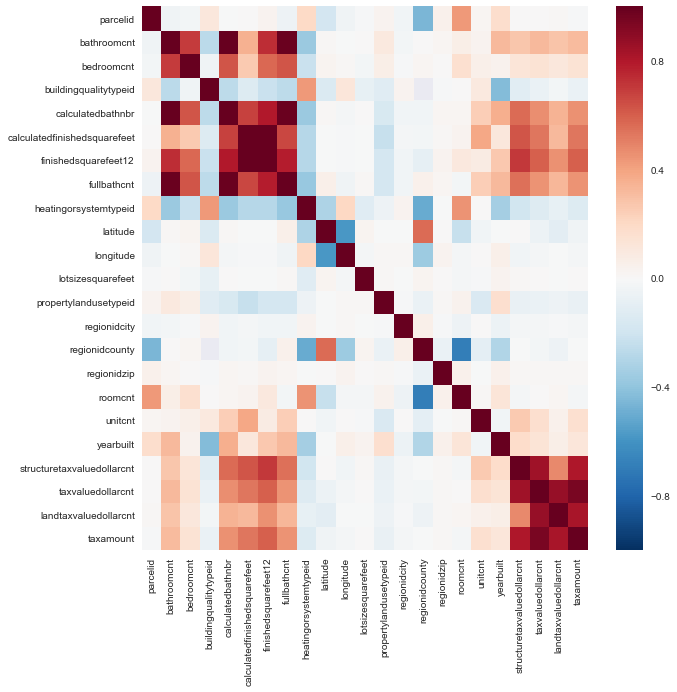

In [29]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims =(10,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=selected_df.corr())

For obvious reasons, the heatmap is a mirror image along the diagonal with gradient -1. The most **positive** relations can be found among few variables like:

1. Full bathroom count and calculated bathroom number
2. Tax assessed value of the parcel and tax of the property

Some variables display a fair positive correlation among them:
1. Bedroom and bathroom counts
2. Calculated finised square feet and bathroom count
3. Calculated finised square feet and bedroom count
4. Full bathroom count and finished square feet
5. Different tax values and finished square feet (as well as number of bedrooms and bathrooms)

The most **negative** relations are:

1. Year the house was built and its quality (confirms the suspicion that houses built later are of good quality now)